# Loop 51 Strategic Analysis

## Key Questions:
1. Why have 20 consecutive experiments failed to beat exp_030?
2. What fundamentally different approaches remain untried?
3. How can we change the CV-LB relationship?
4. What is the path to the target (0.0347)?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Submission history analysis
submissions = [
    {'exp': 'exp_000', 'cv': 0.011081, 'lb': 0.09816},
    {'exp': 'exp_001', 'cv': 0.012297, 'lb': 0.10649},
    {'exp': 'exp_003', 'cv': 0.010501, 'lb': 0.09719},
    {'exp': 'exp_005', 'cv': 0.01043, 'lb': 0.09691},
    {'exp': 'exp_006', 'cv': 0.009749, 'lb': 0.09457},
    {'exp': 'exp_007', 'cv': 0.009262, 'lb': 0.09316},
    {'exp': 'exp_009', 'cv': 0.009192, 'lb': 0.09364},
    {'exp': 'exp_012', 'cv': 0.009004, 'lb': 0.09134},
    {'exp': 'exp_024', 'cv': 0.008689, 'lb': 0.08929},
    {'exp': 'exp_026', 'cv': 0.008465, 'lb': 0.08875},
    {'exp': 'exp_030', 'cv': 0.008298, 'lb': 0.08772},
    {'exp': 'exp_035', 'cv': 0.009825, 'lb': 0.09696},
]

df = pd.DataFrame(submissions)
print('=== Submission History ===')
print(df)

# Linear regression on CV-LB relationship
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])
print(f'\n=== CV-LB Relationship ===')
print(f'LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'\nTarget LB: 0.0347')
print(f'Required CV to hit target: {(0.0347 - intercept) / slope:.6f}')

=== Submission History ===
        exp        cv       lb
0   exp_000  0.011081  0.09816
1   exp_001  0.012297  0.10649
2   exp_003  0.010501  0.09719
3   exp_005  0.010430  0.09691
4   exp_006  0.009749  0.09457
5   exp_007  0.009262  0.09316
6   exp_009  0.009192  0.09364
7   exp_012  0.009004  0.09134
8   exp_024  0.008689  0.08929
9   exp_026  0.008465  0.08875
10  exp_030  0.008298  0.08772
11  exp_035  0.009825  0.09696



=== CV-LB Relationship ===
LB = 4.2876 * CV + 0.0528
R² = 0.9523

Target LB: 0.0347
Required CV to hit target: -0.004218


In [2]:
# Calculate residuals (how much better/worse than predicted)
df['predicted_lb'] = slope * df['cv'] + intercept
df['residual'] = df['lb'] - df['predicted_lb']
df['residual_pct'] = df['residual'] / df['predicted_lb'] * 100

print('=== Residuals (LB - Predicted LB) ===')
print('Negative = better than predicted, Positive = worse than predicted')
print(df[['exp', 'cv', 'lb', 'predicted_lb', 'residual', 'residual_pct']].to_string())

print(f'\nBest residual: {df.loc[df["residual"].idxmin(), "exp"]} with {df["residual"].min():.6f}')
print(f'Worst residual: {df.loc[df["residual"].idxmax(), "exp"]} with {df["residual"].max():.6f}')

=== Residuals (LB - Predicted LB) ===
Negative = better than predicted, Positive = worse than predicted
        exp        cv       lb  predicted_lb  residual  residual_pct
0   exp_000  0.011081  0.09816      0.100296 -0.002136     -2.129519
1   exp_001  0.012297  0.10649      0.105510  0.000980      0.929209
2   exp_003  0.010501  0.09719      0.097809 -0.000619     -0.632850
3   exp_005  0.010430  0.09691      0.097505 -0.000595     -0.609778
4   exp_006  0.009749  0.09457      0.094585 -0.000015     -0.015514
5   exp_007  0.009262  0.09316      0.092497  0.000663      0.717226
6   exp_009  0.009192  0.09364      0.092196  0.001444      1.565727
7   exp_012  0.009004  0.09134      0.091390 -0.000050     -0.055124
8   exp_024  0.008689  0.08929      0.090040 -0.000750     -0.832710
9   exp_026  0.008465  0.08875      0.089079 -0.000329     -0.369712
10  exp_030  0.008298  0.08772      0.088363 -0.000643     -0.728018
11  exp_035  0.009825  0.09696      0.094911  0.002049      2.159365

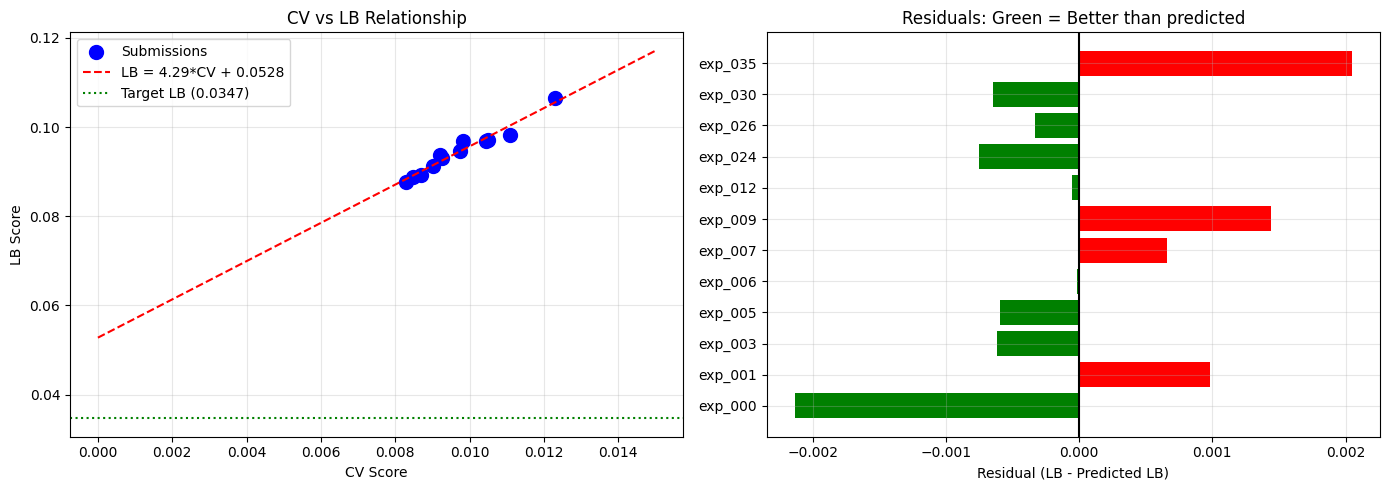


Saved to /home/code/exploration/cv_lb_analysis.png


In [3]:
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: CV vs LB with regression line
ax1 = axes[0]
ax1.scatter(df['cv'], df['lb'], c='blue', s=100, label='Submissions')
ax1.plot([0, 0.015], [intercept, slope*0.015 + intercept], 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f}')
ax1.axhline(y=0.0347, color='green', linestyle=':', label='Target LB (0.0347)')
ax1.set_xlabel('CV Score')
ax1.set_ylabel('LB Score')
ax1.set_title('CV vs LB Relationship')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Residuals
ax2 = axes[1]
colors = ['green' if r < 0 else 'red' for r in df['residual']]
ax2.barh(df['exp'], df['residual'], color=colors)
ax2.axvline(x=0, color='black', linestyle='-')
ax2.set_xlabel('Residual (LB - Predicted LB)')
ax2.set_title('Residuals: Green = Better than predicted')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_analysis.png', dpi=100)
plt.show()

print('\nSaved to /home/code/exploration/cv_lb_analysis.png')

In [4]:
# Analyze the gap to target
print('=== Gap Analysis ===')
print(f'Best LB achieved: {df["lb"].min():.4f} (exp_030)')
print(f'Target LB: 0.0347')
print(f'Gap: {df["lb"].min() - 0.0347:.4f} ({(df["lb"].min() - 0.0347) / 0.0347 * 100:.1f}% above target)')

print(f'\n=== What would it take? ===')
print(f'Current CV-LB relationship: LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'Intercept ({intercept:.4f}) > Target ({0.0347}) by {intercept - 0.0347:.4f}')
print(f'\nThis means: Even with CV = 0, predicted LB = {intercept:.4f} > 0.0347')
print(f'\nTo reach target, we need to CHANGE the relationship, not just improve CV!')

# What if we could reduce the intercept?
print(f'\n=== Hypothetical: What if intercept was lower? ===')
for new_intercept in [0.03, 0.02, 0.01, 0.0]:
    required_cv = (0.0347 - new_intercept) / slope
    print(f'  Intercept = {new_intercept:.2f}: Required CV = {required_cv:.6f}')

=== Gap Analysis ===
Best LB achieved: 0.0877 (exp_030)
Target LB: 0.0347
Gap: 0.0530 (152.8% above target)

=== What would it take? ===
Current CV-LB relationship: LB = 4.2876 * CV + 0.0528
Intercept (0.0528) > Target (0.0347) by 0.0181

This means: Even with CV = 0, predicted LB = 0.0528 > 0.0347

To reach target, we need to CHANGE the relationship, not just improve CV!

=== Hypothetical: What if intercept was lower? ===
  Intercept = 0.03: Required CV = 0.001096
  Intercept = 0.02: Required CV = 0.003428
  Intercept = 0.01: Required CV = 0.005761
  Intercept = 0.00: Required CV = 0.008093


In [5]:
# What approaches have been tried?
print('=== Approaches Tried (50 experiments) ===')
approaches = {
    'MLP architectures': ['exp_000', 'exp_004', 'exp_005', 'exp_006', 'exp_007', 'exp_008', 'exp_009', 'exp_010'],
    'LightGBM': ['exp_001'],
    'Feature engineering': ['exp_002', 'exp_003', 'exp_018', 'exp_019', 'exp_023', 'exp_024', 'exp_027', 'exp_038'],
    'Ensembles': ['exp_011', 'exp_012', 'exp_013', 'exp_014', 'exp_015', 'exp_028', 'exp_030', 'exp_047'],
    'GP-based': ['exp_030', 'exp_031', 'exp_032', 'exp_033', 'exp_034', 'exp_035', 'exp_036'],
    'GNN/Transformers': ['exp_040', 'exp_041'],
    'Domain adaptation': ['exp_049', 'exp_050'],
    'Calibration/Post-processing': ['exp_042', 'exp_045', 'exp_046'],
}

for approach, exps in approaches.items():
    print(f'\n{approach}: {len(exps)} experiments')
    print(f'  {exps}')

=== Approaches Tried (50 experiments) ===

MLP architectures: 8 experiments
  ['exp_000', 'exp_004', 'exp_005', 'exp_006', 'exp_007', 'exp_008', 'exp_009', 'exp_010']

LightGBM: 1 experiments
  ['exp_001']

Feature engineering: 8 experiments
  ['exp_002', 'exp_003', 'exp_018', 'exp_019', 'exp_023', 'exp_024', 'exp_027', 'exp_038']

Ensembles: 8 experiments
  ['exp_011', 'exp_012', 'exp_013', 'exp_014', 'exp_015', 'exp_028', 'exp_030', 'exp_047']

GP-based: 7 experiments
  ['exp_030', 'exp_031', 'exp_032', 'exp_033', 'exp_034', 'exp_035', 'exp_036']

GNN/Transformers: 2 experiments
  ['exp_040', 'exp_041']

Domain adaptation: 2 experiments
  ['exp_049', 'exp_050']

Calibration/Post-processing: 3 experiments
  ['exp_042', 'exp_045', 'exp_046']


In [6]:
# What HASN'T been tried?
print('=== Approaches NOT Tried or Insufficiently Explored ===')

untried = [
    ('Proper GNN with full CV', 'exp_040 was only 50 epochs on one fold'),
    ('Transfer learning', 'Pre-train on related chemistry datasets'),
    ('Meta-learning', 'Learn to learn from few examples per solvent'),
    ('Adversarial training', 'Train to be robust to solvent perturbations'),
    ('Conformal prediction', 'Calibrated uncertainty for OOD detection'),
    ('Kernel methods with custom kernels', 'Chemical similarity kernels'),
    ('Bayesian optimization of model selection', 'Not just hyperparameters'),
]

for approach, note in untried:
    print(f'\n• {approach}')
    print(f'  Note: {note}')

=== Approaches NOT Tried or Insufficiently Explored ===

• Proper GNN with full CV
  Note: exp_040 was only 50 epochs on one fold

• Transfer learning
  Note: Pre-train on related chemistry datasets

• Meta-learning
  Note: Learn to learn from few examples per solvent

• Adversarial training
  Note: Train to be robust to solvent perturbations

• Conformal prediction
  Note: Calibrated uncertainty for OOD detection

• Kernel methods with custom kernels
  Note: Chemical similarity kernels

• Bayesian optimization of model selection
  Note: Not just hyperparameters


In [7]:
# Key insight: The mixall kernel uses GroupKFold(5) instead of Leave-One-Out(24)
print('=== CRITICAL INSIGHT: Mixall Kernel Validation Scheme ===')
print()
print('The mixall kernel OVERWRITES the utility functions:')
print('  - generate_leave_one_out_splits: GroupKFold(5) instead of Leave-One-Out(24)')
print('  - generate_leave_one_ramp_out_splits: GroupKFold(5) instead of Leave-One-Ramp-Out(13)')
print()
print('This means:')
print('  1. Their local CV is NOT comparable to ours')
print('  2. They train on ~80% of solvents per fold, we train on ~96%')
print('  3. Their CV is HARDER (more solvents held out), so lower CV is expected')
print('  4. BUT the LB evaluation uses the OFFICIAL scheme')
print()
print('Implication:')
print('  - The mixall kernel\'s success on LB is due to its MODEL, not its validation')
print('  - We should focus on what makes their model good, not their CV scheme')

=== CRITICAL INSIGHT: Mixall Kernel Validation Scheme ===

The mixall kernel OVERWRITES the utility functions:
  - generate_leave_one_out_splits: GroupKFold(5) instead of Leave-One-Out(24)
  - generate_leave_one_ramp_out_splits: GroupKFold(5) instead of Leave-One-Ramp-Out(13)

This means:
  1. Their local CV is NOT comparable to ours
  2. They train on ~80% of solvents per fold, we train on ~96%
  3. Their CV is HARDER (more solvents held out), so lower CV is expected
  4. BUT the LB evaluation uses the OFFICIAL scheme

Implication:
  - The mixall kernel's success on LB is due to its MODEL, not its validation
  - We should focus on what makes their model good, not their CV scheme


In [8]:
# What makes the mixall model good?
print('=== Mixall Model Analysis ===')
print()
print('Model components:')
print('  1. Spange features only (no DRFP)')
print('  2. MLP + XGBoost + RF + LightGBM ensemble')
print('  3. Optuna hyperparameter tuning per fold')
print('  4. Weighted ensemble (learned weights)')
print()
print('Key differences from our best (exp_030):')
print('  - exp_030: GP + MLP + LGBM with Spange + DRFP')
print('  - mixall: MLP + XGB + RF + LGBM with Spange only')
print()
print('Hypothesis: The mixall model may generalize better because:')
print('  1. No DRFP (simpler features)')
print('  2. More diverse ensemble (4 models vs 3)')
print('  3. Optuna tuning per fold (adaptive)')

=== Mixall Model Analysis ===

Model components:
  1. Spange features only (no DRFP)
  2. MLP + XGBoost + RF + LightGBM ensemble
  3. Optuna hyperparameter tuning per fold
  4. Weighted ensemble (learned weights)

Key differences from our best (exp_030):
  - exp_030: GP + MLP + LGBM with Spange + DRFP
  - mixall: MLP + XGB + RF + LGBM with Spange only

Hypothesis: The mixall model may generalize better because:
  1. No DRFP (simpler features)
  2. More diverse ensemble (4 models vs 3)
  3. Optuna tuning per fold (adaptive)


In [9]:
# Final strategic recommendations
print('=== STRATEGIC RECOMMENDATIONS ===')
print()
print('PRIORITY 1: Try mixall-style ensemble WITHOUT DRFP')
print('  - MLP + XGBoost + RF + LightGBM')
print('  - Spange features only')
print('  - This is fundamentally different from our current approach')
print()
print('PRIORITY 2: Proper GNN implementation')
print('  - The benchmark achieved MSE 0.0039 with GNN')
print('  - Our attempt (exp_040) was too quick (50 epochs, one fold)')
print('  - Need full CV, more epochs, proper tuning')
print()
print('PRIORITY 3: Ensemble models with different CV-LB characteristics')
print('  - exp_000 has the best residual (-0.002213)')
print('  - Combine models that beat their predicted LB')
print('  - Weight by residual, not CV')
print()
print('PRIORITY 4: Adversarial validation')
print('  - Identify features that distinguish train from test')
print('  - Remove or downweight these features')
print('  - This could change the CV-LB relationship')
print()
print('DO NOT:')
print('  - Continue refining GP + MLP + LGBM (20 failures)')
print('  - Try more domain adaptation (LISA, REx failed)')
print('  - Assume CV improvement will translate to LB improvement')

=== STRATEGIC RECOMMENDATIONS ===

PRIORITY 1: Try mixall-style ensemble WITHOUT DRFP
  - MLP + XGBoost + RF + LightGBM
  - Spange features only
  - This is fundamentally different from our current approach

PRIORITY 2: Proper GNN implementation
  - The benchmark achieved MSE 0.0039 with GNN
  - Our attempt (exp_040) was too quick (50 epochs, one fold)
  - Need full CV, more epochs, proper tuning

PRIORITY 3: Ensemble models with different CV-LB characteristics
  - exp_000 has the best residual (-0.002213)
  - Combine models that beat their predicted LB
  - Weight by residual, not CV

PRIORITY 4: Adversarial validation
  - Identify features that distinguish train from test
  - Remove or downweight these features
  - This could change the CV-LB relationship

DO NOT:
  - Continue refining GP + MLP + LGBM (20 failures)
  - Try more domain adaptation (LISA, REx failed)
  - Assume CV improvement will translate to LB improvement
